# Практическая работа 1. Начало работы с API

# 1.2. GitHub API

**1.2.1.** Сгенерировать персональный токен на 7 дней на странице https://github.com/settings/tokens/new

![](https://drive.google.com/uc?export=view&id=1rNV_0jXbY4GLYAlFu-SUbOoGYWk9hKGe)





**1.2.2.**	Настройка окружения: убедитесь, что у вас установлены необходимые библиотеки: requests, pandas, matplotlib, seaborn.

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.2.3.** Подключение к GitHub API

In [2]:
GITHUB_API_URL = "https://api.github.com"
ACCESS_TOKEN = "токен_мой"
headers = {
    "Authorization": f"token {ACCESS_TOKEN}"
}

**1.2.4.** Проанализировать собственные репозитории.

 Чтобы вывести список всех репозиториев пользователя с GitHub и отсортировать их по дате создания с помощью Python, можно воспользоваться библиотекой requests для взаимодействия с GitHub API.

In [3]:
import requests

def get_repositories(username):
    url = f"https://api.github.com/users/{username}/repos"
    response = requests.get(url)

    if response.status_code == 200:
        repos = response.json()
        # Сортируем репозитории по дате создания
        sorted_repos = sorted(repos, key=lambda x: x['created_at'], reverse=True)
        for repo in sorted_repos:
            print(f"Repository: {repo['name']}, Created at: {repo['created_at']}")
    else:
        print(f"Error: Unable to fetch repositories for user {username} (Status code: {response.status_code})")

# Замените 'your-username' на имя пользователя GitHub, чей список репозиториев нужно вывести
get_repositories('MareevaMI')

Repository: PDA_SOL, Created at: 2023-09-12T16:38:02Z


**1.2.5.**	Получение данных о репозиториях. Получить информацию о репозиториях, используя определенный поисковый запрос, например, big data.

In [9]:
query = "project trends"
response = requests.get(f"{GITHUB_API_URL}/search/repositories", params={"q": query}, headers=headers)
data = response.json()
repos = data['items']
repos

[{'id': 336319951,
  'node_id': 'MDEwOlJlcG9zaXRvcnkzMzYzMTk5NTE=',
  'name': 'MATLAB-Simulink-Challenge-Project-Hub',
  'full_name': 'mathworks/MATLAB-Simulink-Challenge-Project-Hub',
  'private': False,
  'owner': {'login': 'mathworks',
   'id': 8590076,
   'node_id': 'MDEyOk9yZ2FuaXphdGlvbjg1OTAwNzY=',
   'avatar_url': 'https://avatars.githubusercontent.com/u/8590076?v=4',
   'gravatar_id': '',
   'url': 'https://api.github.com/users/mathworks',
   'html_url': 'https://github.com/mathworks',
   'followers_url': 'https://api.github.com/users/mathworks/followers',
   'following_url': 'https://api.github.com/users/mathworks/following{/other_user}',
   'gists_url': 'https://api.github.com/users/mathworks/gists{/gist_id}',
   'starred_url': 'https://api.github.com/users/mathworks/starred{/owner}{/repo}',
   'subscriptions_url': 'https://api.github.com/users/mathworks/subscriptions',
   'organizations_url': 'https://api.github.com/users/mathworks/orgs',
   'repos_url': 'https://api.github

**1.2.6** Анализ данных. извлеките и проанализируйте данные, такие как количество звезд, форков, количество открытых issues и т.д.

In [10]:
repo_data = pd.DataFrame(repos, columns=['name', 'stargazers_count', 'forks_count', 'open_issues_count'])
print(repo_data.describe())

       stargazers_count  forks_count  open_issues_count
count         30.000000    30.000000          30.000000
mean         444.733333    88.166667          10.600000
std         1095.214353   253.013709          22.504559
min            1.000000     4.000000           0.000000
25%           20.250000    13.000000           0.000000
50%          113.000000    21.500000           1.500000
75%          347.000000    69.750000           7.500000
max         5921.000000  1398.000000         109.000000


**1.2.6.** Визуализация данных: постройте графики для визуализации активности репозиториев.

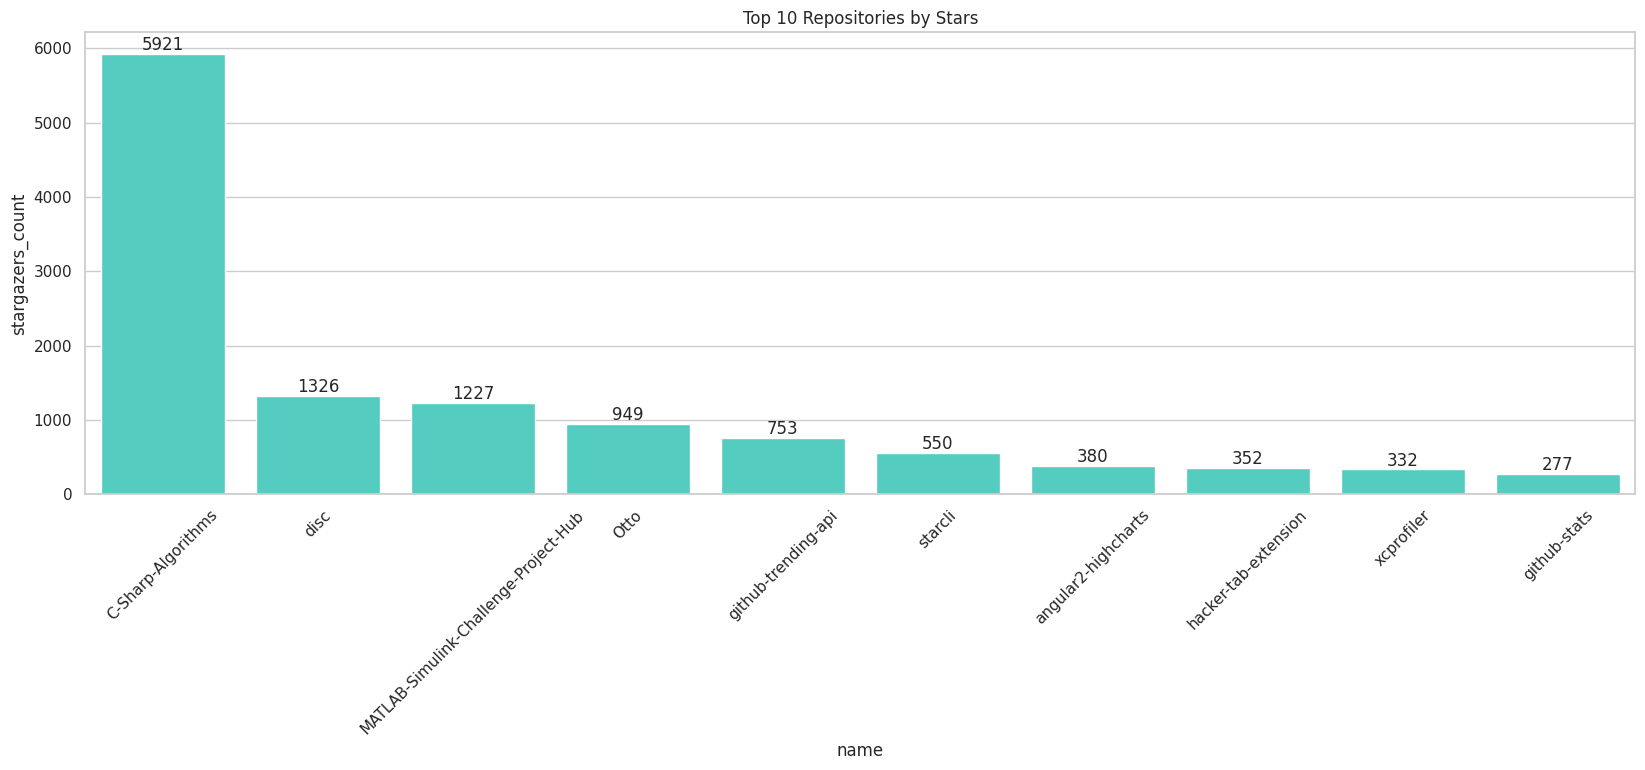

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

repo_data_sorted = repo_data.sort_values(by='stargazers_count', ascending=False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(20, 6))

sns.barplot(x='name', y='stargazers_count', data=repo_data_sorted, color='turquoise')

for i, value in enumerate(repo_data_sorted['stargazers_count']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.title('Top 10 Repositories by Stars')

plt.show()

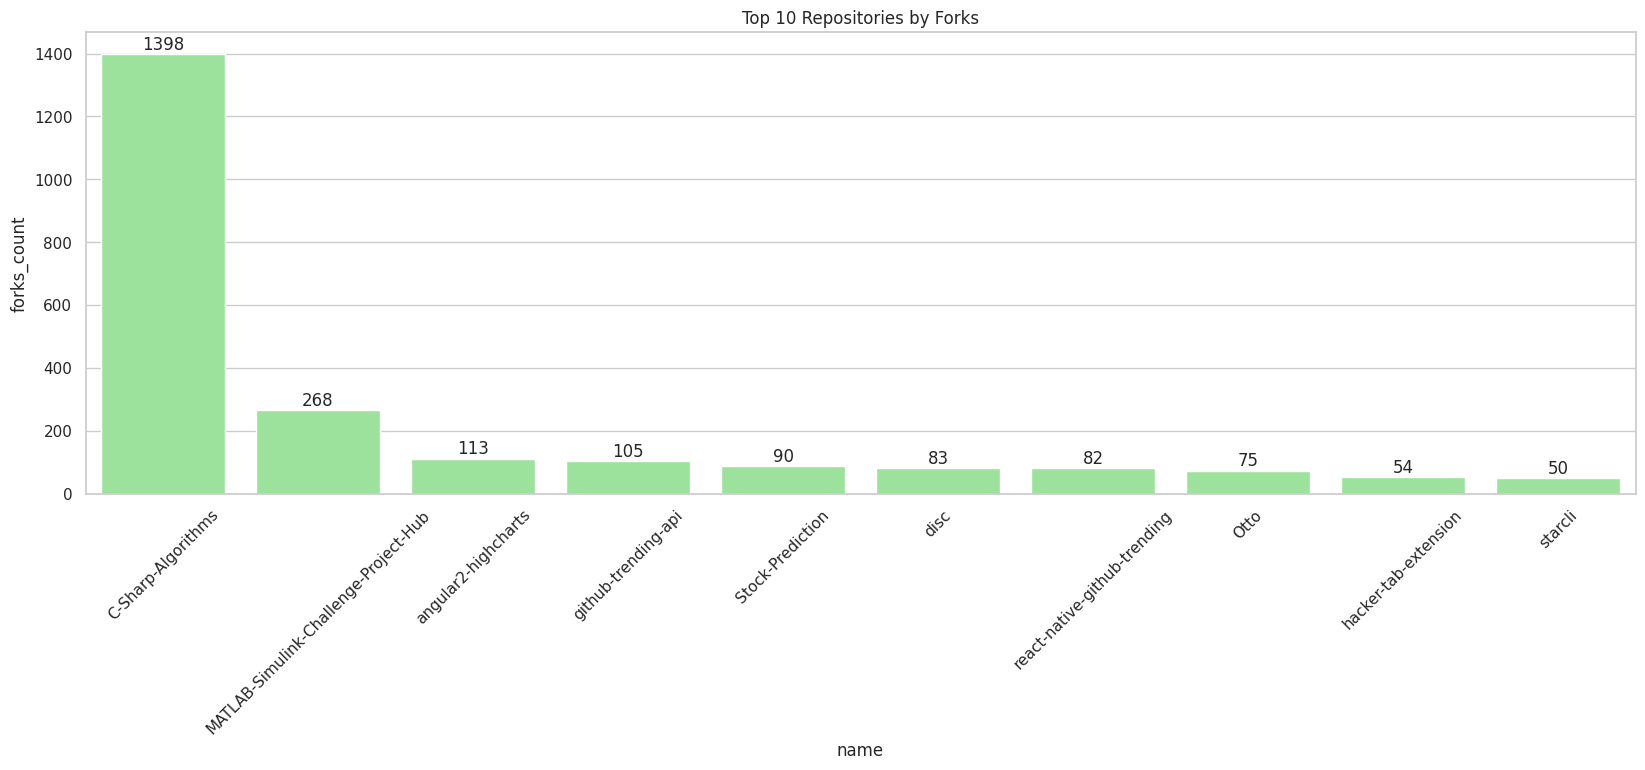

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

repo_data_sorted = repo_data.sort_values(by='forks_count', ascending=False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(20, 6))

sns.barplot(x='name', y='forks_count', data=repo_data_sorted, color='lightgreen')

for i, value in enumerate(repo_data_sorted['forks_count']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.title('Top 10 Repositories by Forks')

plt.show()

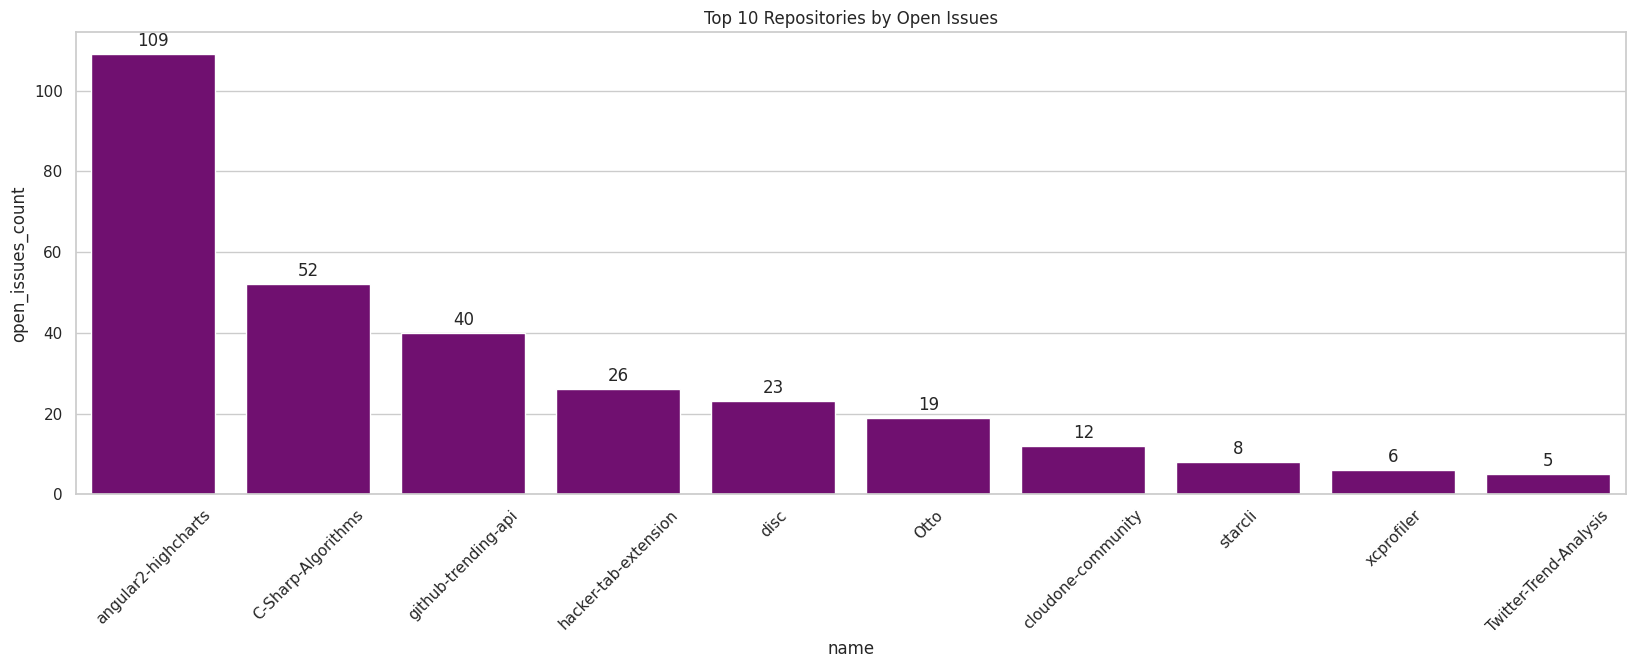

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

repo_data_sorted = repo_data.sort_values(by='open_issues_count', ascending=False).head(10)

sns.set(style="whitegrid")

plt.figure(figsize=(20, 6))

sns.barplot(x='name', y='open_issues_count', data=repo_data_sorted, color='purple')

for i, value in enumerate(repo_data_sorted['open_issues_count']):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)

plt.title('Top 10 Repositories by Open Issues')

plt.show()


**1.2.7.** Анализ активности пользователей. Проанализируйте активность пользователей, например, по количеству коммитов или участия в pull requests. Для этого можно получить данные о коммитах или pull requests для каждого репозитория.

In [23]:
repo_name = repos[0]['full_name']
commit_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/commits", headers=headers)
commits = commit_response.json()
print(f"Number of commits in {repo_name}: {len(commits)}")

Number of commits in mathworks/MATLAB-Simulink-Challenge-Project-Hub: 30


In [25]:
repo_name = 'C-Sharp-Algorithms'
commit_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/commits", headers=headers)
commits = commit_response.json()
print(f"Number of commits in {repo_name}: {len(commits)}")

Number of commits in C-Sharp-Algorithms: 3


In [26]:
repo_name = 'Otto'
commit_response = requests.get(f"{GITHUB_API_URL}/repos/{repo_name}/commits", headers=headers)
commits = commit_response.json()
print(f"Number of commits in {repo_name}: {len(commits)}")

Number of commits in Otto: 3


Токен по завершению работы удален.